In [11]:
!pip install pandas json gzip gemini
!pip install openai
!pip install openai==0.28`
!pip install openai pandas
!pip install openai pandas numpy
!pip install --upgrade openai pandas
!pip uninstall openai -y
!pip install openai --upgrade

Found existing installation: openai 1.44.0
Uninstalling openai-1.44.0:
  Successfully uninstalled openai-1.44.0
  Using cached openai-1.44.0-py3-none-any.whl.metadata (22 kB)
Using cached openai-1.44.0-py3-none-any.whl (367 kB)


In [ ]:
import openai
import gzip
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
file_path = 'Music_Instruments_5.json.gz'

def parse_json(file_path):
    with gzip.open(file_path, 'rb') as f:
        for line in f:
            yield json.loads(line)

data = list(parse_json(file_path))
df = pd.DataFrame(data)
df = df[['reviewText', 'overall', 'summary']]
df.dropna(subset=['reviewText', 'overall', 'summary'], inplace=True)
df.head()

In [2]:
#openai.api_key = '___'

In [ ]:
def analyze_reviews_with_gpt(reviews, analysis_type="themes"):
    responses = []

    if analysis_type == "themes":
        prompt = "Analyze the common themes found in the following review:\n\n{}"
    elif analysis_type == "sentiment":
        prompt = "Analyze the sentiment (positive, neutral, negative) of the following review:\n\n{}"
    elif analysis_type == "improvement_suggestions":
        prompt = "Based on the following review, what improvements can be made?\n\n{}"
    else:
        raise ValueError("Invalid analysis type. Choose from 'themes', 'sentiment', or 'improvement_suggestions'.")
    for review in reviews:
        # Formulate the query
        response = openai.Completion.create(
            model="gpt-3.5-turbo",
            prompt=prompt.format(review),
            max_tokens=100,
            n=1,
            stop=None,
            temperature=0.7,
        )
        responses.append(response.choices[0].text.strip())

    return responses

sample_reviews = df['reviewText'].head(5).tolist()

themes = analyze_reviews_with_gpt(sample_reviews, analysis_type="themes")
print("Common Themes:", themes)

sentiments = analyze_reviews_with_gpt(sample_reviews, analysis_type="sentiment")
print("Sentiments:", sentiments)

improvement_suggestions = analyze_reviews_with_gpt(sample_reviews, analysis_type="improvement_suggestions")
print("Improvement Suggestions:", improvement_suggestions)

In [ ]:
df = df[['reviewText', 'summary']]
df.dropna(subset=['reviewText', 'summary'], inplace=True)

def analyze_reviews_with_gpt(reviews, analysis_type="themes"):
    responses = []

    if analysis_type == "themes":
        prompt = "Analyze the common themes found in the following review:\n\n{}"
    elif analysis_type == "sentiment":
        prompt = "Analyze the sentiment (positive, neutral, negative) of the following review:\n\n{}"
    elif analysis_type == "improvement_suggestions":
        prompt = "Based on the following review, what improvements can be made?\n\n{}"
    else:
        raise ValueError("Invalid analysis type. Choose from 'themes', 'sentiment', or 'improvement_suggestions'.")
    for review in reviews:
        # Formulate the query
        response = openai.Completion.create(
            model="gpt-3.5-turbo",
            prompt=prompt.format(review),
            max_tokens=100,
            n=1,
            stop=None,
            temperature=0.7,
        )
        responses.append(response.choices[0].text.strip())

    return responses

sample_reviews = df['reviewText'].sample(50).tolist()
themes = analyze_reviews_with_gpt(sample_reviews, analysis_type="themes")
sentiments = analyze_reviews_with_gpt(sample_reviews, analysis_type="sentiment")
result_df = pd.DataFrame({
    'reviewText': sample_reviews,
    'Themes': themes,
    'Sentiment': sentiments
})

result_df.head()

In [ ]:
common_themes = result_df['Themes'].value_counts().head(10)
sentiment_summary = result_df['Sentiment'].value_counts()
print("Most Common Themes:\n", common_themes)
print("\nSentiment Distribution:\n", sentiment_summary)

In [ ]:
sns.set(style="whitegrid")

def plot_common_themes(theme_data):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=theme_data.values, y=theme_data.index, palette="Blues_d")
    plt.title("Most Common Themes in Reviews", fontsize=16)
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("Themes", fontsize=14)
    plt.show()

def plot_sentiment_distribution(sentiment_data):
    plt.figure(figsize=(7, 7))
    plt.pie(sentiment_data.values, labels=sentiment_data.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107', '#F44336'])
    plt.title("Sentiment Distribution of Reviews", fontsize=16)
    plt.axis('equal')
    plt.show()

common_themes = result_df['Themes'].value_counts().head(10)
sentiment_summary = result_df['Sentiment'].value_counts()
plot_common_themes(common_themes)
plot_sentiment_distribution(sentiment_summary)

Alternative Method: for uploaded the data

In [14]:
!pip install nltk textblob

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
file_path = 'Musical_instruments_reviews.csv'
df = pd.read_csv(file_path)

print(df.head())

       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                   

In [11]:
df.info()
df.columns
df.describe()
df.dtypes
df = df.dropna(subset=['reviewText', 'overall', 'summary'])
df.drop_duplicates()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [12]:
print(f'Cleaned dataset shape: {df.shape}')

Cleaned dataset shape: (10254, 9)


In [17]:
def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['reviewText'].apply(analyze_sentiment)

all_words = []
for review in df['reviewText']:
    all_words.extend(clean_text(review))

word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

print('Most common words:', common_words)

Most common words: [('guitar', 5472), ('one', 4402), ('great', 4026), ('like', 3897), ('use', 3724), ('good', 3720), ('sound', 3507), ('strings', 3349), ('well', 3042), ('get', 2657)]


In [18]:
def summarize_sentiments(sentiments):
    positive = len([s for s in sentiments if s > 0])
    neutral = len([s for s in sentiments if s == 0])
    negative = len([s for s in sentiments if s < 0])
    total = len(sentiments)

    return {
        'positive': positive / total,
        'neutral': neutral / total,
        'negative': negative / total
    }

sentiment_summary = summarize_sentiments(df['sentiment'])
print('Sentiment Summary:', sentiment_summary)

Sentiment Summary: {'positive': 0.9171055197971524, 'neutral': 0.017261556465769455, 'negative': 0.06563292373707821}


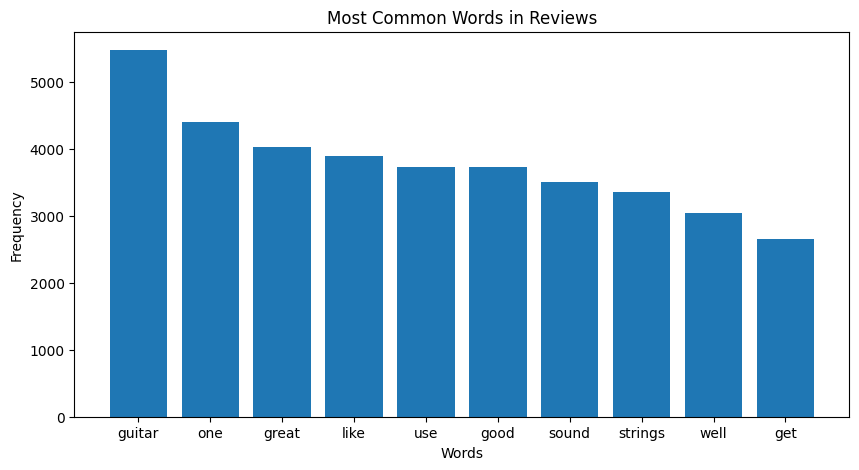

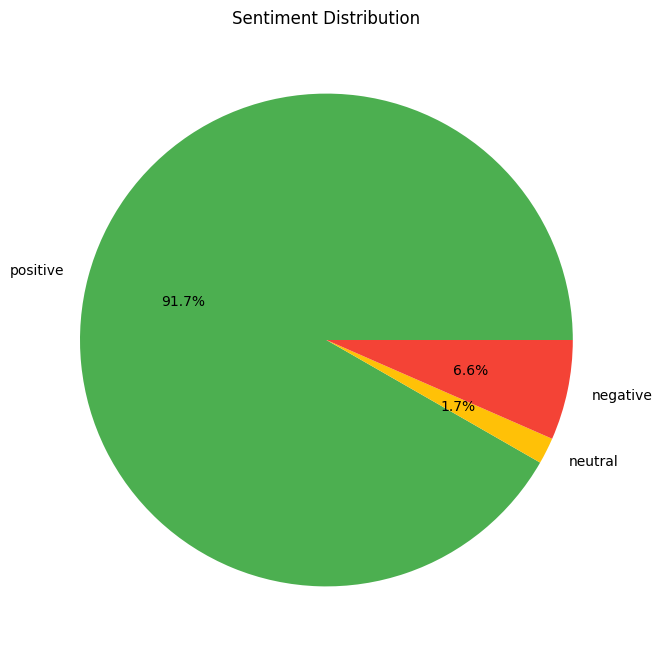

In [20]:
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Reviews')
plt.show()

sentiment_labels = list(sentiment_summary.keys())
sentiment_values = list(sentiment_summary.values())

plt.figure(figsize=(8, 8))
plt.pie(sentiment_values, labels=sentiment_labels, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107', '#F44336'])
plt.title('Sentiment Distribution')
plt.show()